In [2]:
#Credit: https://studymachinelearning.com/keras-modeling-sequential-vs-functional-api/
#Credit: https://www.geeksforgeeks.org/how-to-do-train-test-split-using-sklearn-in-python/

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import tensorflow as tf

from keras.models import Sequential, Model
from keras.layers import Dense, Input

import matplotlib.pyplot as plt
import pandas as pd

bc = datasets.load_breast_cancer()
X = bc.data
y = bc.target

# Convert the dataset to a DataFrame
bc_df = pd.DataFrame(data=bc.data, columns=bc.feature_names)

# Add target variable to the DataFrame
bc_df['target'] = bc.target

#print(bc_df.head())

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=5,test_size=0.25,shuffle=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [3]:
def define_model():
    model = Sequential()
    model.add(Dense(6, input_dim=30, activation='linear'))
    model.add(Dense(3, activation='tanh'))
    model.add(Dense(2, activation='linear'))
    model.add(Dense(1, activation='sigmoid'))
    adam = tf.keras.optimizers.Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy',optimizer=adam, metrics=['accuracy'])
    return model

model = define_model()


model.fit(X_train, y_train, epochs=100,batch_size=32)



Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.5897 - accuracy: 0.6714
Epoch 2/100
14/14 [==============================] - 0s 2ms/step - loss: 0.3064 - accuracy: 0.9366
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1726 - accuracy: 0.9695
Epoch 4/100
14/14 [==============================] - 0s 2ms/step - loss: 0.1126 - accuracy: 0.9742
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9742
Epoch 6/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0718 - accuracy: 0.9789
Epoch 7/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0612 - accuracy: 0.9836
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0542 - accuracy: 0.9859
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0504 - accuracy: 0.9836
Epoch 10/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0493 - accuracy: 0.9883
Epoch 11/

Test Accuracy: 0.99
5/5 [==============================] - 0s 3ms/step


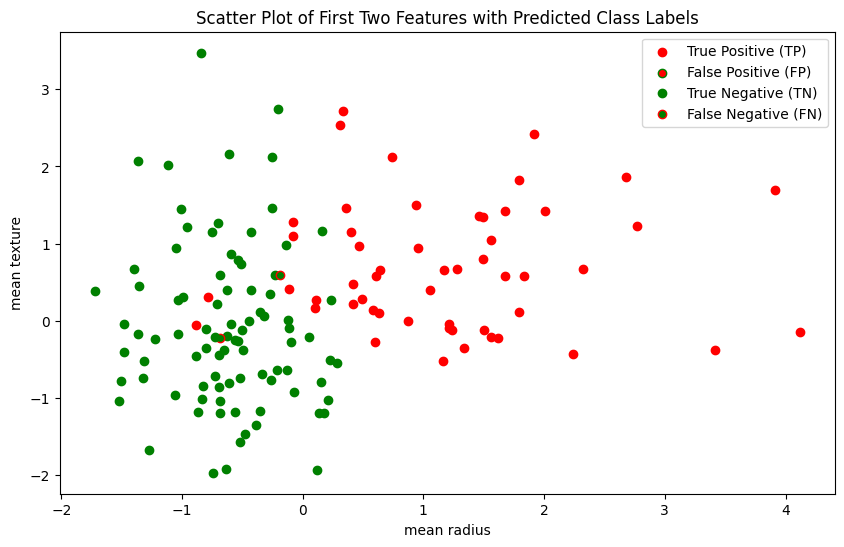

In [12]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

plt.figure(figsize=(10, 6))
# Define the different markers for the legend
tp_marker = plt.scatter([], [], color='red', edgecolor='red', label='True Positive (TP)')
fp_marker = plt.scatter([], [], color='red', edgecolor='green', label='False Positive (FP)')
tn_marker = plt.scatter([], [], color='green', edgecolor='green', label='True Negative (TN)')
fn_marker = plt.scatter([], [], color='green', edgecolor='red', label='False Negative (FN)')

# Plot the points with boundary color based on ground truth
for i in range(len(y_test)):
    if y_test[i] == 0:  # Malignant
        edge_color = 'red'
    else:  # Benign
        edge_color = 'green'

    if y_pred[i] == 0:  # Predicted as Malignant
        face_color = 'red'
    else:  # Predicted as Benign
        face_color = 'green'

    plt.scatter(X_test[i, 0], X_test[i, 1], facecolors=face_color, edgecolors=edge_color, linewidths=1)


plt.title('Scatter Plot of First Two Features with Predicted Class Labels')
plt.xlabel(bc.feature_names[0])
plt.ylabel(bc.feature_names[1])
plt.legend(handles=[tp_marker, fp_marker, tn_marker, fn_marker], loc='best')
plt.show()

In [14]:
input1 = Input(shape=(30,))
hidden1 = Dense(6, activation='linear')(input1)
hidden2 = Dense(3, activation='tanh')(hidden1)
hidden3 = Dense(2, activation='linear')(hidden2)
output = Dense(1, activation='sigmoid')(hidden3)
fmodel = Model(inputs=input1, outputs=output)
adam = tf.keras.optimizers.Adam(learning_rate=0.01)
fmodel.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

fmodel.fit(X_train, y_train, epochs=100,batch_size=32)

Epoch 1/100
14/14 [==============================] - 1s 3ms/step - loss: 0.2349 - accuracy: 0.9202
Epoch 2/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0885 - accuracy: 0.9648
Epoch 3/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0684 - accuracy: 0.9718
Epoch 4/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0550 - accuracy: 0.9789
Epoch 5/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0518 - accuracy: 0.9789
Epoch 6/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9859
Epoch 7/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0414 - accuracy: 0.9906
Epoch 8/100
14/14 [==============================] - 0s 2ms/step - loss: 0.0363 - accuracy: 0.9906
Epoch 9/100
14/14 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.9883
Epoch 10/100
14/14 [==============================] - 0s 4ms/step - loss: 0.0347 - accuracy: 0.9906
Epoch 11/

Test Accuracy: 0.99
5/5 [==============================] - 0s 3ms/step


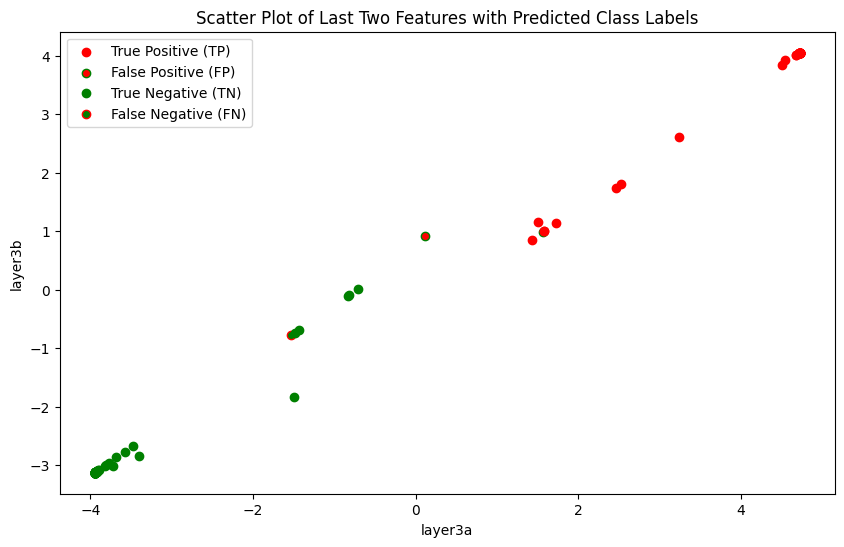

In [18]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.2f}')
y_pred_prob = fmodel.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32")

features = Model(inputs=input1, outputs=hidden3)
features_pred = features.predict(X_test)

plt.figure(figsize=(10, 6))
# Define the different markers for the legend
tp_marker = plt.scatter([], [], color='red', edgecolor='red', label='True Positive (TP)')
fp_marker = plt.scatter([], [], color='red', edgecolor='green', label='False Positive (FP)')
tn_marker = plt.scatter([], [], color='green', edgecolor='green', label='True Negative (TN)')
fn_marker = plt.scatter([], [], color='green', edgecolor='red', label='False Negative (FN)')

# Plot the points with boundary color based on ground truth
for i in range(len(y_test)):
    if y_test[i] == 0:  # Malignant
        edge_color = 'red'
    else:  # Benign
        edge_color = 'green'

    if y_pred[i] == 0:  # Predicted as Malignant
        face_color = 'red'
    else:  # Predicted as Benign
        face_color = 'green'

    plt.scatter(features_pred[i, 0], features_pred[i, 1], facecolors=face_color, edgecolors=edge_color, linewidths=1)

plt.title('Scatter Plot of Last Two Features with Predicted Class Labels')
plt.xlabel('layer3a')
plt.ylabel('layer3b')
plt.legend(handles=[tp_marker, fp_marker, tn_marker, fn_marker], loc='best')
plt.show()